In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df_sms = pd.read_csv('sms_raw_NB.csv',encoding = 'ISO-8859-1')
df_sms.head()


,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


In [3]:
len(df_sms)

5559

In [4]:
df_sms.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [5]:
df_sms.groupby('type').describe()

text                                                               
     count unique                                                top freq
type                                                                     
ham   4812   4503                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [6]:
df_sms['length']=df_sms['text'].apply(len)
df_sms.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


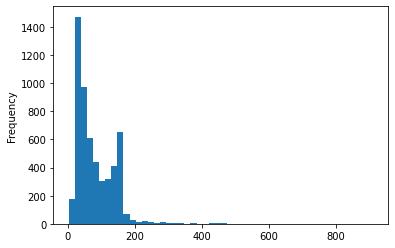

In [7]:
df_sms['length'].plot(bins=50,kind='hist')

In [8]:
df_sms.length.describe()

count    5559.000000
mean       79.893326
std        59.200791
min         2.000000
25%        35.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

In [9]:
df_sms[df_sms['length']==910]['text'].iloc[0]


"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [10]:
import string
mess = 'Example message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
print(nopunc)

Example message


In [11]:
from nltk.corpus import stopwords
stopwords.words('english')[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [12]:
nopunc.split()

['Example', 'message']

In [13]:
clean_mess=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [14]:
clean_mess

['Example', 'message']

In [15]:
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
df_sms.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


In [17]:
df_sms['text'].head(5).apply(text_process)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, å£100...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: text, dtype: object

In [18]:
df_sms.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000...",150
4,spam,okmail: Dear Dave this is your final notice to...,161


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(df_sms['text'])
print(len(bow_transformer.vocabulary_))

11356


In [21]:
message4=df_sms['text'][3]
print(message4)

complimentary 4 STAR Ibiza Holiday or å£10,000 cash needs your URGENT collection. 09066364349 NOW from Landline not to lose out! Box434SK38WP150PPM18+


In [22]:
bow4=bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 262)	1
  (0, 605)	1
  (0, 1296)	1
  (0, 2244)	1
  (0, 2329)	1
  (0, 2588)	1
  (0, 3523)	1
  (0, 4066)	1
  (0, 5331)	1
  (0, 5554)	1
  (0, 5601)	1
  (0, 7847)	1
  (0, 8343)	1
  (0, 11304)	1
(1, 11356)


In [23]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

USED
sees


In [35]:
df_sms_bow = bow_transformer.transform(df_sms['text'])

In [36]:
print('Shape of Sparse Matrix: ',df_sms_bow.shape)
print('Amount of non-zero occurences:',df_sms_bow.nnz)

Shape of Sparse Matrix:  (5559, 11356)
Amount of non-zero occurences: 50014


In [26]:
sparsity =(100.0 * df_sms_bow.nnz/(df_sms_bow.shape[0]*df_sms_bow.shape[1]))
print('sparsity:{}'.format(round(sparsity)))

sparsity:0


In [37]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(df_sms_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 11304)	0.2886588513405475
  (0, 8343)	0.26016042466750977
  (0, 7847)	0.26016042466750977
  (0, 5601)	0.26016042466750977
  (0, 5554)	0.2332211897066975
  (0, 5331)	0.20699668006135605
  (0, 4066)	0.2169360073935419
  (0, 3523)	0.32915177840434773
  (0, 2588)	0.2780553934168467
  (0, 2329)	0.2953789049732685
  (0, 2244)	0.24076955349243523
  (0, 1296)	0.32915177840434773
  (0, 605)	0.147541827236046
  (0, 262)	0.32915177840434773


In [38]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['university']])

3.067996495433963
8.524741098576518


In [39]:
df_sms_tfidf=tfidf_transformer.transform(df_sms_bow)
print(df_sms_tfidf.shape)

(5559, 11356)


In [42]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(df_sms_tfidf,df_sms['type'])

In [44]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',df_sms.type[3])

predicted: spam
expected: spam


In [45]:
all_predictions = spam_detect_model.predict(df_sms_tfidf)
print(all_predictions)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']


In [47]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(df_sms['type'],all_predictions))
print(confusion_matrix(df_sms['type'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4812
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5559
   macro avg       0.99      0.92      0.95      5559
weighted avg       0.98      0.98      0.98      5559

[[4812    0]
 [ 115  632]]


In [50]:
from sklearn.model_selection import train_test_split
text_train,text_test,type_train,type_test = train_test_split(df_sms['text'],df_sms['type'],test_size=0.2)

In [51]:
print(len(text_train),len(text_test),len(type_train),len(type_test))

4447 1112 4447 1112


In [52]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

In [53]:
pipeline.fit(text_train,type_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x00000068D66D4510>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [54]:
predictions = pipeline.predict(text_test)

In [55]:
print(classification_report(predictions,type_test))

              precision    recall  f1-score   support

         ham       1.00      0.95      0.97      1002
        spam       0.68      1.00      0.81       110

    accuracy                           0.95      1112
   macro avg       0.84      0.97      0.89      1112
weighted avg       0.97      0.95      0.96      1112

